# Regresion Logistica de los sobrevivientes del titanic

# Maria Alejandra Cardenas Anaya

# 1. Carga de datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('Titanic-Dataset.csv')

In [5]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 2. Desarrollo

En esta parte nos interesa explorar los datos y explicar el modelo de regresión logística a este caso de sobrevivientes del titanic

## 2.1 Exploración de datos

Miramos una tabla y una gráfica de los datos que nos interesan

In [6]:
train[['PassengerId','Survived']].head()

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


<Axes: xlabel='PassengerId', ylabel='Survived'>

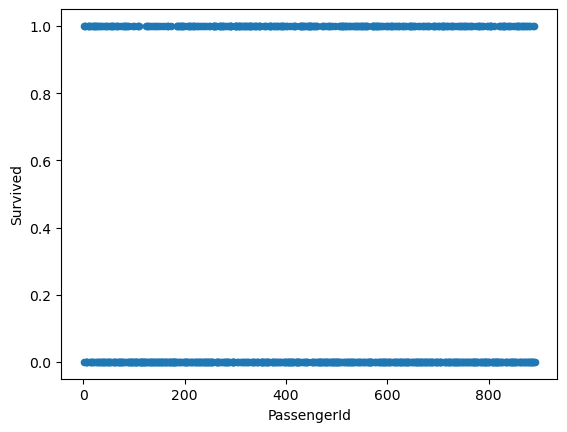

In [7]:
train[['PassengerId','Survived']].plot.scatter(x='PassengerId',y='Survived')

## 2.2 Función logística

Vamos a pintar una función logistica sobre estos datos

$$ f_{w,b}\left(\vec{x}^{(i)}\right)=\frac{1}{1+\exp-\left(w\vec{x}+b\right)}$$
Vamos a variar $w,b$ a ver que pasa en los datos

In [9]:
# pruebas de parametro
w = 0.09
b = -3.6

In [10]:
# despues de hacer el modelos (se explica más adelante)
# intercepto (b): [-3.68596089]
# pendiente (w): [[0.09351691]]

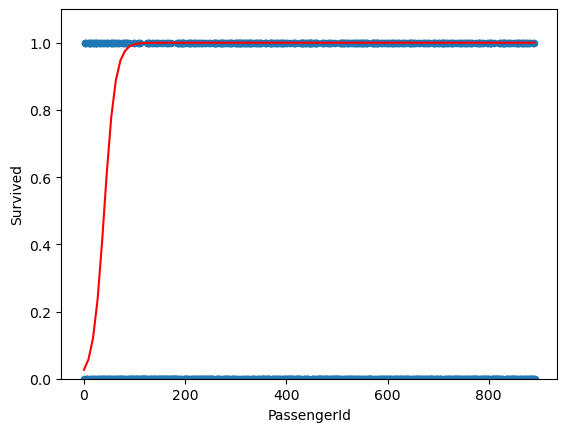

In [11]:
# puntos de la recta
x = np.linspace(0,train['PassengerId'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
train.plot.scatter(x='PassengerId',y='Survived')
plt.plot(x, y, '-r')
plt.ylim(0,train['Survived'].max()*1.1)
# plt.grid()
plt.show()


## 2.3 Optimización de parámetros

Si escogemos esos parametros $w,b$ para el modelo, ¿Qué tan buenos son?

Podemos utilizar la siguiente estrategia:
* calcular el valor de la función logística para cada dato
* calcular la función de pérdida (se denota con L o loss)
* calcular el promedio de la pérdida para obtener el costo (se denota con Jo cost)

Queremos los valores $w,b$ que resulten en un menor costo

Las ecuaciones para las funciones son

$$ L\left(f_{w,b}\left(\vec{x}^{(i)}\right),y^{(i)}\right)=-y^{(i)}\log\left(f_{w,b}\left(\vec{x}^{(i)}\right)\right)-\left(1-y^{(i)}\right)\log\left(1-f_{w,b}\left(\vec{x}^{(i)}\right)\right) $$

$$ J\left(w,b\right)=\frac{1}{m}\sum_{i=1}^{m}\left[L\left(f_{w,b}\left(\vec{x}^{(i)}\right),y^{(i)}\right)\right] $$


In [14]:
# calculo de las predicciones
train['sigmoid'] = 1/(1+np.exp(-(train['Pclass']*w+b)))

# calculo de la funcion de error
train['loss_xi'] = -train['Fare']*np.log(train['sigmoid'])-(1-train['Fare'])*np.log(1-train['sigmoid'])
cost_j = train['loss_xi'].mean()
cost_j

111.32940986629836

Esto lo hemos hecho con los parametros que hemos obtenido a ojo por ciento. Ahora vamos a ser más refinados y calcularlo para muchos parametros a la vez y luego de ahi mirar el que tenga menor costo.

Para eso hacemos lo siguiente:
* Construimos un dataframe con valores para $w,b$ que varían sobre una cuadricula o grid
* Creamos una función de python que calcule el costo $J$ dados parametros $w,b$
* Aplicamos la función sobre el dataframe con los valores $w,b$ en la cuadricula
* Podemos ordenar la tabla resultante para obtener los valores $w,b$ con el menor costo
* Luego hacemos gráficas para verificar el resultado

In [8023]:
# hacemos dataframe para calcular el error en funcion de los parametros w, b

In [15]:
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array, 
                  columns = ['w','b'])

# round para solventar problema con muchos decimales
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)

In [21]:
df

,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96
...,...,...
995,0.14,-3.05
996,0.14,-3.04
997,0.14,-3.03
998,0.14,-3.02


In [17]:
def sum_error_df(df):
    train['sigmoid'] = 1/(1+np.exp(-(train['Pclass']*df['w']+df['b'])))
    train['loss_xi'] = -train['Fare']*np.log(train['sigmoid'])-(1-train['Fare'])*np.log(1-train['sigmoid'])
    j_cost = train['loss_xi'].mean()
    return(j_cost)

In [18]:
df['error'] = df.apply(sum_error_df, axis=1)

In [19]:
df.sort_values(by=['error']).head()

,w,b,error
999,0.14,-3.01,89.784869
998,0.14,-3.02,90.106273
899,0.13,-3.01,90.298785
997,0.14,-3.03,90.427683
898,0.13,-3.02,90.620203


In [20]:
df_3d = df.pivot(index='w', columns='b', values='error')

In [21]:
df_3d.head()

b,-4.00,-3.99,-3.98,-3.97,-3.96,-3.95,-3.94,-3.93,-3.92,-3.91,...,-3.10,-3.09,-3.08,-3.07,-3.06,-3.05,-3.04,-3.03,-3.02,-3.01
w,,,,,,,,,,,,,,,,,,,,,
0.05,126.260027,125.938187,125.616350,125.294514,124.972681,124.650849,124.329020,124.007193,123.685368,123.363545,...,97.305238,96.983680,96.662127,96.340578,96.019034,95.697494,95.375960,95.054430,94.732905,94.411385
0.06,125.745071,125.423236,125.101403,124.779573,124.457744,124.135917,123.814093,123.492271,123.170451,122.848633,...,96.790946,96.469399,96.147856,95.826319,95.504786,95.183258,94.861734,94.540216,94.218703,93.897195
0.07,125.230128,124.908298,124.586470,124.264644,123.942820,123.620999,123.299179,122.977362,122.655547,122.333735,...,96.276683,95.955147,95.633616,95.312089,94.990568,94.669051,94.347540,94.026033,93.704532,93.383036
0.08,124.715197,124.393372,124.071549,123.749728,123.427910,123.106094,122.784279,122.462468,122.140658,121.818850,...,95.762449,95.440925,95.119405,94.797890,94.476381,94.154876,93.833376,93.511882,93.190393,92.868909
0.09,124.200280,123.878460,123.556642,123.234827,122.913013,122.591202,122.269393,121.947587,121.625783,121.303981,...,95.248246,94.926733,94.605225,94.283723,93.962225,93.640732,93.319245,92.997763,92.676286,92.354815


In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

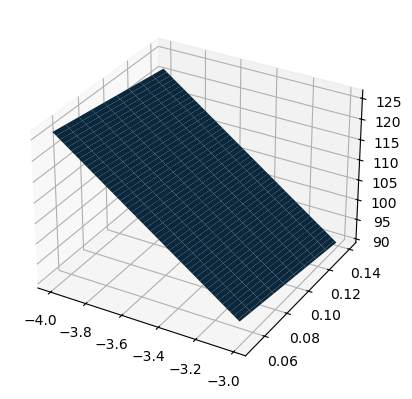

In [22]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

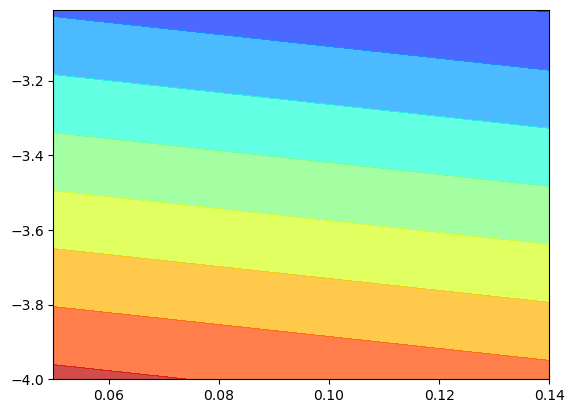

In [23]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d
plt.contourf(Y, X, Z, alpha=0.7, cmap=plt.cm.jet)

## Bonus: Optimizando los parámetros

Esta sección es opcional.

Vamos a utilizar el método del gradiente descendente para calcular los valores optimos de $w,b$.

Para esto tenemos que calcular el gradiente para $w,b$ con respecto de la función J (esta es la que hemos gráficado), sus funciones son

$$ \frac{\partial}{\partial w}J\left(w,b\right)=\frac{1}{m}\sum_{i=1}^{m}\left(f_{w,b}\left(\vec{x}^{(i)}\right)-y^{(i)}\right)x^{(i)} $$

$$ \frac{\partial}{\partial b}J\left(w,b\right)=\frac{1}{m}\sum_{i=1}^{m}\left(f_{w,b}\left(\vec{x}^{(i)}\right)-y^{(i)}\right)$$

Las funciones respectivas en python serían

In [25]:
def delta_j_w(w, b):
    train['sigmoid'] = 1/(1+np.exp(-(train['Pclass']*w+b)))
    train['partial_loss'] = (train['sigmoid']-train['Fare'])*train['Pclass']
    derivative = train['partial_loss'].mean()
    return(derivative) 

def delta_j_b(w, b):
    train['sigmoid'] = 1/(1+np.exp(-(train['Pclass']*w+b)))
    train['partial_loss'] = (train['sigmoid']-train['Fare'])
    derivative = train['partial_loss'].mean()
    return(derivative) 

Damos valores iniciales a $w,b$

In [26]:
w_0 = 0.09
b_0 = -3.57

Empezamos a iterar hasta obtener valores que no varíen tanto

In [27]:
alpha_w = 0.001
alpha_b = 0.1

w_new = w_0 - alpha_w * delta_j_w(w_0, b_0)
b_new = b_0 - alpha_b * delta_j_b(w_0, b_0)

w_0 = w_new
b_0 = b_new

print(w_0, b_0)

0.14146389341841856 -0.3529373531477993


In [223]:
# valores optimos de sklearn (más abajo la explicación)
# w = 0.09351691
# b = -3.68596089

Ahora vamos a hacer lo mismo pero mucho más rápido con sklear

In [31]:
from sklearn.linear_model import LogisticRegression

# definiendo input y output
X_train = np.array(train['PassengerId']).reshape((-1, 1))
Y_train = np.array(train['Survived'])

# creando modelo
model = LogisticRegression()
model.fit(X_train, Y_train)

# imprimiendo parametros
print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (w): {model.coef_}")

intercepto (b): [-0.45544805]
pendiente (w): [[-4.00261488e-05]]
